In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
veh = pd.read_csv('../../data/vehicles.csv')
veh.head()

C:\Users\miche\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   
3  29.964545         0.0        0.0        0.0      10      0.0        0   
4  17.347895         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
3  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
4  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

   phevCity  phevHwy  phevComb  
0         0        0         0  
1         0        0         0  
2         0        0         0  
3         0        0         0  
4         0        0         0  

[5 rows x 83 columns]

In [82]:
clean = veh.dropna(axis = 1, how = 'all', thresh = 40000)
clean.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   
3  29.964545         0.0        0.0        0.0      10      0.0        0   
4  17.347895         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  UHighwayA           VClass  year  \
0       0.0     0.0    0.0  ...        0.0      Two Seaters  1985   
1       0.0     0.0    0.0  ...        0.0      Two Seaters  1985   
2       0.0     0.0    0.0  ...        0.0  Subcompact Cars  1985   
3       0.0     0.0    0.0  ...        0.0             Vans  1985   
4       0.0     0.0    0.0  ...        0.0     Compact Cars  1993   

   youSaveSpend  charge240b                     createdOn  \
0         -1750         0.0  Tue Jan 01 00:00:00 EST 2013   
1         -8750         0.0  Tue Jan 01 00:00:00 EST 2013   
2             0         0.0  Tue Jan 01 00:00:00 EST 2013   
3         -8750         0.0  Tue Jan 01 00:00:00 EST 2013   
4         -5250         0.0  Tue Jan 01 00:00:00 EST 2013   

                     modifiedOn  phevCity  phevHwy  phevComb  
0  Tue Jan 01 00:00:00 EST 2013         0        0         0  
1  Tue Jan 01 00:00:00 EST 2013         0        0         0  
2  Tue Jan 01 00:00:00 EST 2013         0        0         0  
3  Tue Jan 01 00:00:00 EST 2013         0        0         0  
4  Tue Jan 01 00:00:00 EST 2013         0        0         0  

[5 rows x 70 columns]

clean

In [65]:
new = clean[(clean['VClass'] =='Two Seaters') | (clean['VClass'] =='Vans')]
new['co2TailpipeGpm']
new.loc[new['VClass'] == 'Two Seaters','co2TailpipeGpm']

0         423.190476
1         807.909091
688       493.722222
689       467.736842
690       403.954545
            ...     
42550     493.722222
42551     444.350000
42552     423.190476
42553     403.954545
42554    1110.875000
Name: co2TailpipeGpm, Length: 2183, dtype: float64

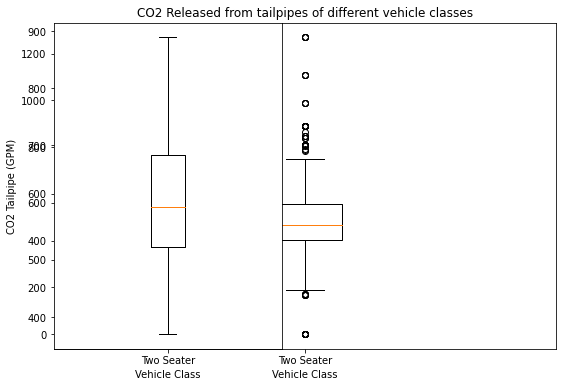

In [81]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot(new.loc[new['VClass'] == 'Two Seaters','co2TailpipeGpm'])
ax.set_xticklabels(["Two Seater"])
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Tailpipe (GPM)")
plt.title("CO2 Released from tailpipes of different vehicle classes")

ax = fig.add_subplot(121)
plt.boxplot(new.loc[new['VClass'] == 'Vans','co2TailpipeGpm'])
ax.set_xticklabels(["Two Seater"])
plt.xlabel("Vehicle Class")

plt.show()